<a href="https://colab.research.google.com/github/NickWield43/MADSmilestone2/blob/main/ImagePlayground/Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Clone the entire repo.
!git clone -l -s https://github.com/ian-byrne/MADSmilestone2.git

# Change directory into cloned repo
%cd MADSmilestone2

# List repo contents
!ls

Cloning into 'MADSmilestone2'...
remote: Enumerating objects: 826, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 826 (delta 83), reused 79 (delta 79), pack-reused 739 (from 1)
Receiving objects: 100% (826/826), 10.35 MiB | 19.23 MiB/s, done.
Resolving deltas: 100% (446/446), done.
/content/MADSmilestone2/MADSmilestone2
Analysis.ipynb		      multimodel2.ipynb
BECK_S_BYRNE_I_Final_695.pdf  presentation_CNN2_scores.ipynb
CNN2_scores.ipynb	      presentation_Supervised_CNN.ipynb
Data			      Presentation_Transfer_Learning_Kmeans.ipynb
dataloader_tests.ipynb	      proj_models.py
ImagePlayground		      README.md
Labeling		      scores_cnn_resnet.ipynb
Loading			      Supervised_CNN.ipynb
Model_Datasets.ipynb	      Transfer_Learning_Kmeans.ipynb
multimodel1.ipynb	      utils.py


In [15]:
!pip install Pillow

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!rm -rf

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
from PIL import Image
import ImagePlayground.Images as Images # Contains functions: get_images_test(), get_coordinates(), viz_image()
import ast
import os

In [18]:
# Read round, id, label dictionary file

path = '/content/MADSmilestone2/Data/Dictionaries/dementia_label_dicts/customLabelDict.txt'
cust_file = open(path, "r")
#print(cust_file.readline())
contents = cust_file.read()
dictionary = ast.literal_eval(contents)
cust_file.close()

In [19]:
def get_images_test():
    counter = 0
    store_images = []
    image_data = []

    for id, array in dictionary.items():
        for value in array:
            if counter < 1:
                # Construct the file path in Google Drive
                file_path = f'/content/drive/MyDrive/Nhats Dataset/NHATS_R11_ClockDrawings_V2/10000008.tif'

                # Check if file exists
                if not os.path.exists(file_path):
                    print(f"File not found: {file_path}")
                    continue

                # Open image directly from Google Drive
                im_pil = Image.open(file_path)
                resize = im_pil.resize((512, 662))
                imarray1 = np.array(resize)
                image_data.append(get_coordinates(imarray1))
                viz_image(imarray1, im_pil)
                counter += 1

    return image_data


def get_coordinates(data):
    image = data
    image_array = np.where(image == False)  # np.argwhere(image == False)
    return image_array

def viz_image(image, image_pil):
    print("shape: ", image.shape)
    plt.figure(figsize=(9,11))
    im2 = Image.fromarray(np.array(image))
    plt.imshow(im2)
    plt.show()

# Call the function



shape:  (662, 512)


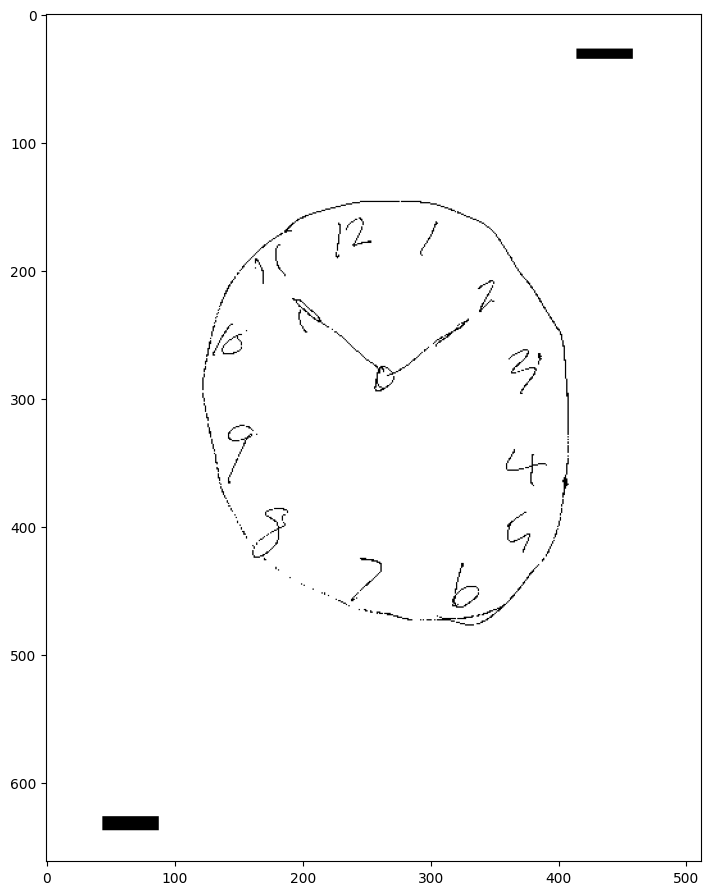

[(array([ 27,  27,  27, ..., 637, 637, 637]),
  array([414, 415, 416, ...,  85,  86,  87]))]

In [20]:
get_images_test()